In [118]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import cmapPy.pandasGEXpress as pandasGEXpress
import cmapPy.pandasGEXpress.parse as cparse
#import cmapPy.pandasGEXpress.parse

from cmapPy.pandasGEXpress.write_gct import write
from cmapPy.pandasGEXpress import gctx2gct
from cmapPy.pandasGEXpress import*

from sklearn.preprocessing import LabelEncoder

import seaborn as sns


In [3]:
siginfo = pd.read_csv("/home/ndjed/Programs/VSCode/LINCS_Project/siginfo_beta.txt", sep = '\t')

/tmp/ipykernel_21449/122777034.py:1: DtypeWarning: Columns (0,3,4,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  siginfo = pd.read_csv("/home/ndjed/Programs/VSCode/LINCS_Project/siginfo_beta.txt", sep = '\t')


In [5]:
control_data_5 = cparse.parse("/home/ndjed/Programs/VSCode/LINCS_Project/level5_beta_ctl_n58022x12328.gctx")
control_df_5 = control_data_5.data_df

In [6]:
cp_data_5_brca = pd.read_csv("/home/ndjed/Programs/VSCode/LINCS_Project/BRCA_COMPOUND_5_DATA_5_DRUGS")

In [8]:
gene_names = pd.read_csv("/data3/balaji/cmap/geneinfo_beta.txt", sep = '\t')


In [9]:
cp_data_5_brca

ASG002_22RV1_24H:G01  ASG002_22RV1_24H:G02  ASG002_22RV1_24H:G03  \
0                    6.3341                5.2243                1.4654   
1                    5.7040                3.8875                1.5365   
2                   -2.9910               -1.9209               -1.0358   
3                    3.9700                5.6208                0.5289   
4                   -2.3277               -2.3518                0.2349   
...                     ...                   ...                   ...   
12323                4.2057                3.6518                1.9640   
12324                1.6694               -0.2801               -1.4899   
12325                6.7483                5.7797                1.7852   
12326                3.6206                3.9382                0.8368   
12327                2.1597               -2.6141                0.5818   

       ASG002_A204_24H:G01  ASG002_A204_24H:G02  ASG002_A204_24H:G03  \
0                   6.2629               3.9781               1.2195   
1                   1.6703               1.3070               2.7850   
2                  -2.9038              -5.0097              -2.3691   
3                   3.9876               2.2609              -0.5697   
4                  -3.5842              -1.6755              -1.4238   
...                    ...                  ...                  ...   
12323               3.4635               3.6315               2.9119   
12324               1.8976               2.9089              -1.2112   
12325               3.7609               4.1686               2.2781   
12326               2.9154               2.0799               2.1706   
12327              -1.1932               1.3871               0.6373   

       ASG002_A375_24H:G01  ASG002_A375_24H:G02  ASG002_A375_24H:G03  \
0                   6.1488               4.0922               1.1059   
1                   5.4293               0.7800               1.4167   
2                  -2.9722              -4.9434              -1.7842   
3                   1.9401               0.9537              -0.4397   
4                  -7.8688               0.3276               0.1025   
...                    ...                  ...                  ...   
12323               2.6375               1.7725               4.3800   
12324              -5.8008              -2.5927              -1.6764   
12325               9.5054               3.4288               2.5153   
12326               6.0032               4.7213               1.1074   
12327              -1.6868               0.7457               3.2476   

       ASG002_A549_24H:G01  ...  REP.B026_YAPC_24H:K15  REP.B026_YAPC_24H:K16  \
0                 4.514831  ...                0.81095                0.19735   
1                 3.941693  ...               -0.43355                0.35725   
2                -2.379551  ...               -0.92210                0.73370   
3                 0.792092  ...               -0.39895                0.41420   
4                -5.111275  ...               -1.41400               -0.27745   
...                    ...  ...                    ...                    ...   
12323             4.631664  ...               -0.32870               -1.02080   
12324            -0.796254  ...                0.44215                0.03705   
12325             6.226738  ...                0.96875                0.05385   
12326             6.225053  ...                0.25605               -0.05165   
12327            -0.384285  ...                0.16045               -0.98140   

       REP.B026_YAPC_24H:K17  REP.B026_YAPC_24H:K18  REP.B026_YAPC_24H:L19  \
0                   -1.12305                0.01275               -1.67480   
1                   -0.04215                0.11075               -1.35725   
2                   -0.46610               -0.21345               -1.44465   
3                    0.53530                0.14940                1.87780   
4            

In [10]:
pca = PCA(n_components=50)


X = pca.fit(cp_data_5_brca).transform(cp_data_5_brca)


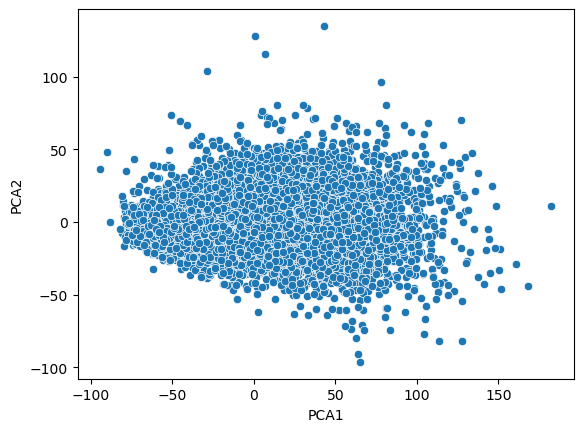

In [17]:
le = LabelEncoder()
target = ['doxorubicin', "epirubicin", 'paclitaxel', 'docitaxel', 'capecitabine']
le.fit(target)

y_lan = le.transform(target)
pca_df = pd.DataFrame(columns = ["x", "y", "name", "label"])

pca_df["PCA1"] = X[:, 0]
pca_df["PCA2"] = X[:, 1]

# pca_df["Disease"] = target

# pca_df["label"] = y_lan

ax = sns.scatterplot(x = "PCA1", y = "PCA2", data = pca_df)


In [18]:
data = pd.read_table("/home/ndjed/Downloads/201028_GSE122505_Leukemia_clean.txt")

In [19]:
data

DDR1   MIR4640      RFC2     HSPA6      PAX8    GUCA1A    MIR5193  \
0     7.135135  7.135135  6.482099  6.676021  6.645632  6.382956   9.792603   
1     7.379455  7.379455  6.824016  6.575389  6.866953  5.777188   9.868853   
2     7.776574  7.776574  6.777692  6.833048  6.740570  5.758784   9.503343   
3     7.610568  7.610568  6.876088  6.331511  6.806035  5.697665  10.752530   
4     7.734832  7.734832  7.227384  6.647835  6.610387  5.643476  10.536639   
...        ...       ...       ...       ...       ...       ...        ...   
2374  7.038301  7.038301  6.850005  7.901066  6.346733  5.267717   7.767640   
2375  7.345443  7.345443  6.636042  6.879693  6.672030  6.021948   8.308662   
2376  6.712769  6.712769  6.383325  6.440957  6.420609  5.559144   8.105112   
2377  6.773485  6.773485  6.665699  6.688221  6.425495  5.712962   7.996249   
2378  7.064806  7.064806  7.039954  7.165704  6.421011  5.513378   8.965281   

           UBA7      THRA    PTPN21  ...  LOC100129924   FAM86B1   FAM86B2  \
0      9.792603  6.519152  5.807912  ...      5.566997  7.410738  7.410738   
1      9.868853  6.739256  5.394392  ...      6.389914  7.684605  7.684605   
2      9.503343  6.585977  5.269234  ...      6.359589  7.432409  7.432409   
3     10.752530  6.454185  5.232170  ...      6.214732  7.004306  7.004306   
4     10.536639  6.391109  5.396083  ...      6.360325  7.707046  7.707046   
...         ...       ...       ...  ...           ...       ...       ...   
2374   7.767640  6.419903  5.186932  ...      6.376156  6.644048  6.644048   
2375   8.308662  6.669993  5.549938  ...      6.243571  7.027639  7.027639   
2376   8.105112  6.381601  5.335782  ...      6.473089  6.537953  6.537953   
2377   7.996249  6.493025  5.208735  ...      6.118339  6.716129  6.716129   
2378   8.965281  6.443766  5.276918  ...      6.245918  6.849754  6.849754   

       FAM86DP   FAM86FP    SNHG17  LOC100505915   GSM  disease      FAB  
0     7.410738  7.410738  7.482258      5.944763     1      AML       M2  
1     7.684605  7.684605  7.800407      6.344267     2      AML       M4  
2     7.432409  7.432409  7.514223      6.742695     3      AML       M2  
3     7.004306  7.004306  8.008685      6.567193     4      AML       M2  
4     7.707046  7.707046  7.715277      6.274365     5      AML       M2  
...        ...       ...       ...           ...   ...      ...      ...  
2374  6.644048  6.644048  7.711407      5.770466  2375      AML       M1  
2375  7.027639  7.027639  7.192586      6.124443  2376      AML  unknown  
2376  6.537953  6.537953  7.530842      5.957701  2377      AML       M6  
2377  6.716129  6.716129  7.172273      5.952782  2378      AML  unknown  
2378  6.849754  6.849754  7.147006      5.898618  2379      AML  unknown  

[2379 rows x 14211 columns]

In [20]:
cp_data_5_brca = cp_data_5_brca.transpose()

In [21]:
cp_data_5_brca

0        1       2        3        4        5      \
ASG002_22RV1_24H:G01   6.33410  5.70400 -2.9910  3.97000 -2.32770 -0.78200   
ASG002_22RV1_24H:G02   5.22430  3.88750 -1.9209  5.62080 -2.35180  0.73080   
ASG002_22RV1_24H:G03   1.46540  1.53650 -1.0358  0.52890  0.23490 -1.05160   
ASG002_A204_24H:G01    6.26290  1.67030 -2.9038  3.98760 -3.58420  0.72170   
ASG002_A204_24H:G02    3.97810  1.30700 -5.0097  2.26090 -1.67550  3.18790   
...                        ...      ...     ...      ...      ...      ...   
REP.B026_YAPC_24H:L20 -0.92225 -0.14645 -0.9265 -0.03145  1.89000 -0.20630   
REP.B026_YAPC_24H:L21 -0.63020  0.04550 -0.9308  0.21290  1.64660 -1.50235   
REP.B026_YAPC_24H:L22 -0.62080 -0.20980 -0.4029 -0.90250  1.25960 -0.58805   
REP.B026_YAPC_24H:L23  0.13440  0.79915  1.0952 -0.41675 -0.79345  0.05815   
REP.B026_YAPC_24H:L24 -0.95885  1.05515 -1.0027 -1.34425 -0.89090  0.77560   

                         6        7        8        9      ...    12318  \
ASG002_22RV1_24H:G01   0.43000  2.15220 -1.59440 -2.38990  ...  5.53550   
ASG002_22RV1_24H:G02  -0.93080 -0.91310  1.23510  2.46130  ...  2.13820   
ASG002_22RV1_24H:G03  -1.71340  2.33870  1.33400 -0.37810  ...  1.90850   
ASG002_A204_24H:G01    1.01550  0.37970  2.52370 -1.39260  ...  4.40180   
ASG002_A204_24H:G02   -1.11800 -1.10590  2.51240 -2.22560  ...  1.80410   
...                        ...      ...      ...      ...  ...      ...   
REP.B026_YAPC_24H:L20 -0.13580  0.46325  0.73180 -3.10110  ...  0.72090   
REP.B026_YAPC_24H:L21 -0.18510  0.61155 -0.56870 -2.19470  ... -0.32895   
REP.B026_YAPC_24H:L22  0.05435  0.27205  0.00080 -0.19640  ... -0.71325   
REP.B026_YAPC_24H:L23 -0.05590  0.33350 -1.20590 -1.28050  ...  0.20310   
REP.B026_YAPC_24H:L24 -0.33810 -1.28755  1.03025 -1.04205  ... -1.56320   

                         12319    12320    12321    12322    12323    12324  \
ASG002_22RV1_24H:G01  -6.61030 -0.37310 -3.58270  0.01030  4.20570  1.66940   
ASG002_22RV1_24H:G02  -5.14940 -1.66400 -1.13240 -1.55710  3.65180 -0.28010   
ASG002_22RV1_24H:G03  -3.01880 -1.85170  0.16560  0.36850  1.96400 -1.48990   
ASG002_A204_24H:G01   -6.56670 -2.50950 -4.27450  4.64700  3.46350  1.89760   
ASG002_A204_24H:G02   -3.82420  1.96380 -2.51930  7.68220  3.63150  2.90890   
...                        ...      ...      ...      ...      ...      ...   
REP.B026_YAPC_24H:L20  0.92925  2.80470  1.73870 -0.49975 -0.77360 -0.36160   
REP.B026_YAPC_24H:L21 -0.63220  0.90825  0.70775  1.14750 -1.24290 -0.39485   
REP.B026_YAPC_24H:L22 -0.66000  0.81245  0.32815  0.02905 -0.15255  0.55350   
REP.B026_YAPC_24H:L23 -1.75405  1.06260 -0.30405  0.08155  0.45810 -1.05690   
REP.B026_YAPC_24H:L24  0.50430 -0.20015 -0.69815  0.94570  0.23480 -0.06915   

                         12325    12326    12327  
ASG002_22RV1_24H:G01   6.74830  3.62060  2.15970  
ASG002_22RV1_24H:G02   5.77970  3.93820 -2.61410  
ASG002_22RV1_24H:G03   1.78520  0.83680  0.58180  
ASG002_A204_24H:G01    3.76090  2.91540 -1.19320  
ASG002_A204_24H:G02    4.16860  2.07990  1.38710  
...                        ...      ...      ...  
REP.B026_YAPC_24H:L20 -0.01055  0.02765 -1.36035  
REP.B026_YAPC_24H:L21 -0.79165 -0.20550 -0.07555  
REP.B026_YAPC_24H:L22 -0.01380 -0.50600 -0.20165  
REP.B026_YAPC_24H:L23  0.24240 -0.25945 -0.07505  
REP.B026_YAPC_24H:L24 -0.75145  0.23845 -0.09190  

[2150 rows x 12328 columns]

In [22]:
cp_data_5_brca['disease'] = 0

In [23]:
cp_data_5_brca.iloc[0:665, 12328] = 1

In [24]:
cp_data_5_brca

0        1       2        3        4        5  \
ASG002_22RV1_24H:G01   6.33410  5.70400 -2.9910  3.97000 -2.32770 -0.78200   
ASG002_22RV1_24H:G02   5.22430  3.88750 -1.9209  5.62080 -2.35180  0.73080   
ASG002_22RV1_24H:G03   1.46540  1.53650 -1.0358  0.52890  0.23490 -1.05160   
ASG002_A204_24H:G01    6.26290  1.67030 -2.9038  3.98760 -3.58420  0.72170   
ASG002_A204_24H:G02    3.97810  1.30700 -5.0097  2.26090 -1.67550  3.18790   
...                        ...      ...     ...      ...      ...      ...   
REP.B026_YAPC_24H:L20 -0.92225 -0.14645 -0.9265 -0.03145  1.89000 -0.20630   
REP.B026_YAPC_24H:L21 -0.63020  0.04550 -0.9308  0.21290  1.64660 -1.50235   
REP.B026_YAPC_24H:L22 -0.62080 -0.20980 -0.4029 -0.90250  1.25960 -0.58805   
REP.B026_YAPC_24H:L23  0.13440  0.79915  1.0952 -0.41675 -0.79345  0.05815   
REP.B026_YAPC_24H:L24 -0.95885  1.05515 -1.0027 -1.34425 -0.89090  0.77560   

                             6        7        8        9  ...    12319  \
ASG002_22RV1_24H:G01   0.43000  2.15220 -1.59440 -2.38990  ... -6.61030   
ASG002_22RV1_24H:G02  -0.93080 -0.91310  1.23510  2.46130  ... -5.14940   
ASG002_22RV1_24H:G03  -1.71340  2.33870  1.33400 -0.37810  ... -3.01880   
ASG002_A204_24H:G01    1.01550  0.37970  2.52370 -1.39260  ... -6.56670   
ASG002_A204_24H:G02   -1.11800 -1.10590  2.51240 -2.22560  ... -3.82420   
...                        ...      ...      ...      ...  ...      ...   
REP.B026_YAPC_24H:L20 -0.13580  0.46325  0.73180 -3.10110  ...  0.92925   
REP.B026_YAPC_24H:L21 -0.18510  0.61155 -0.56870 -2.19470  ... -0.63220   
REP.B026_YAPC_24H:L22  0.05435  0.27205  0.00080 -0.19640  ... -0.66000   
REP.B026_YAPC_24H:L23 -0.05590  0.33350 -1.20590 -1.28050  ... -1.75405   
REP.B026_YAPC_24H:L24 -0.33810 -1.28755  1.03025 -1.04205  ...  0.50430   

                         12320    12321    12322    12323    12324    12325  \
ASG002_22RV1_24H:G01  -0.37310 -3.58270  0.01030  4.20570  1.66940  6.74830   
ASG002_22RV1_24H:G02  -1.66400 -1.13240 -1.55710  3.65180 -0.28010  5.77970   
ASG002_22RV1_24H:G03  -1.85170  0.16560  0.36850  1.96400 -1.48990  1.78520   
ASG002_A204_24H:G01   -2.50950 -4.27450  4.64700  3.46350  1.89760  3.76090   
ASG002_A204_24H:G02    1.96380 -2.51930  7.68220  3.63150  2.90890  4.16860   
...                        ...      ...      ...      ...      ...      ...   
REP.B026_YAPC_24H:L20  2.80470  1.73870 -0.49975 -0.77360 -0.36160 -0.01055   
REP.B026_YAPC_24H:L21  0.90825  0.70775  1.14750 -1.24290 -0.39485 -0.79165   
REP.B026_YAPC_24H:L22  0.81245  0.32815  0.02905 -0.15255  0.55350 -0.01380   
REP.B026_YAPC_24H:L23  1.06260 -0.30405  0.08155  0.45810 -1.05690  0.24240   
REP.B026_YAPC_24H:L24 -0.20015 -0.69815  0.94570  0.23480 -0.06915 -0.75145   

                         12326    12327  disease  
ASG002_22RV1_24H:G01   3.62060  2.15970        1  
ASG002_22RV1_24H:G02   3.93820 -2.61410        1  
ASG002_22RV1_24H:G03   0.83680  0.58180        1  
ASG002_A204_24H:G01    2.91540 -1.19320        1  
ASG002_A204_24H:G02    2.07990  1.38710        1  
...                        ...      ...      ...  
REP.B026_YAPC_24H:L20  0.02765 -1.36035        0  
REP.B026_YAPC_24H:L21 -0.20550 -0.07555        0  
REP.B026_YAPC_24H:L22 -0.50600 -0.20165        0  
REP.B026_YAPC_24H:L23 -0.25945 -0.07505        0  
REP.B026_YAPC_24H:L24  0.23845 -0.09190        0  

[2150 rows x 12329 columns]

In [25]:
cp_data_5_brca.iloc[665:1095, 12328] = 2
cp_data_5_brca.iloc[1095:1618, 12328] = 3
cp_data_5_brca.iloc[1618:1955, 12328] = 4
cp_data_5_brca.iloc[1955:2150] = 5

In [26]:
cp_data_5_brca

0       1       2       3       4       5       6  \
ASG002_22RV1_24H:G01   6.3341  5.7040 -2.9910  3.9700 -2.3277 -0.7820  0.4300   
ASG002_22RV1_24H:G02   5.2243  3.8875 -1.9209  5.6208 -2.3518  0.7308 -0.9308   
ASG002_22RV1_24H:G03   1.4654  1.5365 -1.0358  0.5289  0.2349 -1.0516 -1.7134   
ASG002_A204_24H:G01    6.2629  1.6703 -2.9038  3.9876 -3.5842  0.7217  1.0155   
ASG002_A204_24H:G02    3.9781  1.3070 -5.0097  2.2609 -1.6755  3.1879 -1.1180   
...                       ...     ...     ...     ...     ...     ...     ...   
REP.B026_YAPC_24H:L20  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L21  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L22  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L23  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L24  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000   

                            7       8       9  ...   12319   12320   12321  \
ASG002_22RV1_24H:G01   2.1522 -1.5944 -2.3899  ... -6.6103 -0.3731 -3.5827   
ASG002_22RV1_24H:G02  -0.9131  1.2351  2.4613  ... -5.1494 -1.6640 -1.1324   
ASG002_22RV1_24H:G03   2.3387  1.3340 -0.3781  ... -3.0188 -1.8517  0.1656   
ASG002_A204_24H:G01    0.3797  2.5237 -1.3926  ... -6.5667 -2.5095 -4.2745   
ASG002_A204_24H:G02   -1.1059  2.5124 -2.2256  ... -3.8242  1.9638 -2.5193   
...                       ...     ...     ...  ...     ...     ...     ...   
REP.B026_YAPC_24H:L20  5.0000  5.0000  5.0000  ...  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L21  5.0000  5.0000  5.0000  ...  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L22  5.0000  5.0000  5.0000  ...  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L23  5.0000  5.0000  5.0000  ...  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L24  5.0000  5.0000  5.0000  ...  5.0000  5.0000  5.0000   

                        12322   12323   12324   12325   12326   12327  disease  
ASG002_22RV1_24H:G01   0.0103  4.2057  1.6694  6.7483  3.6206  2.1597        1  
ASG002_22RV1_24H:G02  -1.5571  3.6518 -0.2801  5.7797  3.9382 -2.6141        1  
ASG002_22RV1_24H:G03   0.3685  1.9640 -1.4899  1.7852  0.8368  0.5818        1  
ASG002_A204_24H:G01    4.6470  3.4635  1.8976  3.7609  2.9154 -1.1932        1  
ASG002_A204_24H:G02    7.6822  3.6315  2.9089  4.1686  2.0799  1.3871        1  
...                       ...     ...     ...     ...     ...     ...      ...  
REP.B026_YAPC_24H:L20  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000        5  
REP.B026_YAPC_24H:L21  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000        5  
REP.B026_YAPC_24H:L22  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000        5  
REP.B026_YAPC_24H:L23  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000        5  
REP.B026_YAPC_24H:L24  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000        5  

[2150 rows x 12329 columns]

In [89]:
df = cp_data_5_brca.iloc[:, :12328]

In [79]:
df['num_range'] = np.arange(len(df))

In [85]:
df = df.filter(a.index, axis = "rows")

In [81]:
df.index = df['num_range']

In [34]:
target = cp_data_5_brca['disease']

In [44]:
target

ASG002_22RV1_24H:G01     1
ASG002_22RV1_24H:G02     1
ASG002_22RV1_24H:G03     1
ASG002_A204_24H:G01      1
ASG002_A204_24H:G02      1
                        ..
REP.B026_YAPC_24H:L20    5
REP.B026_YAPC_24H:L21    5
REP.B026_YAPC_24H:L22    5
REP.B026_YAPC_24H:L23    5
REP.B026_YAPC_24H:L24    5
Name: disease, Length: 2150, dtype: int64

In [50]:
target = pd.DataFrame(target)
target = target.iloc[:,0].tolist()

In [112]:
X = pca.fit(df).transform(df)
le.fit(target)
y_lan = le.transform(target)
pca_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
pca_df["PCA1"] = X[:, 0]
pca_df["PCA2"] = X[:, 1]
pca_df["Drug"] = target
pca_df["label"] = y_lan

In [83]:
filt1 = pca_df['PCA2'] < 350
filt2 = pca_df['PCA1'] < 350

a = pca_df[filt1]


In [88]:
filt3 = pca_df['PCA1'] > 400

pca_df[filt3]['PCA1'].value_counts()

475.565522    195
Name: PCA1, dtype: int64

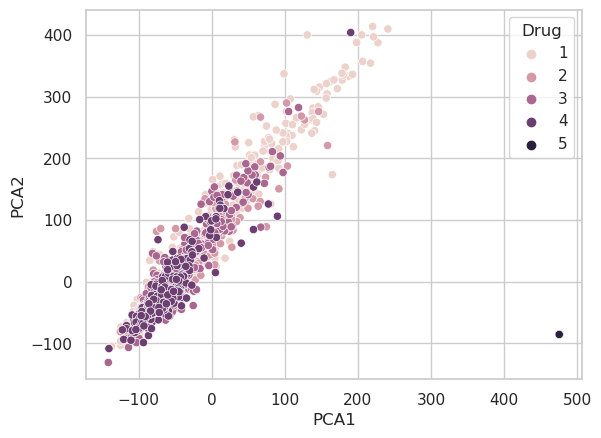

In [113]:
ax = sns.scatterplot(x = "PCA1", y = "PCA2", hue = 'Drug', data = pca_df)

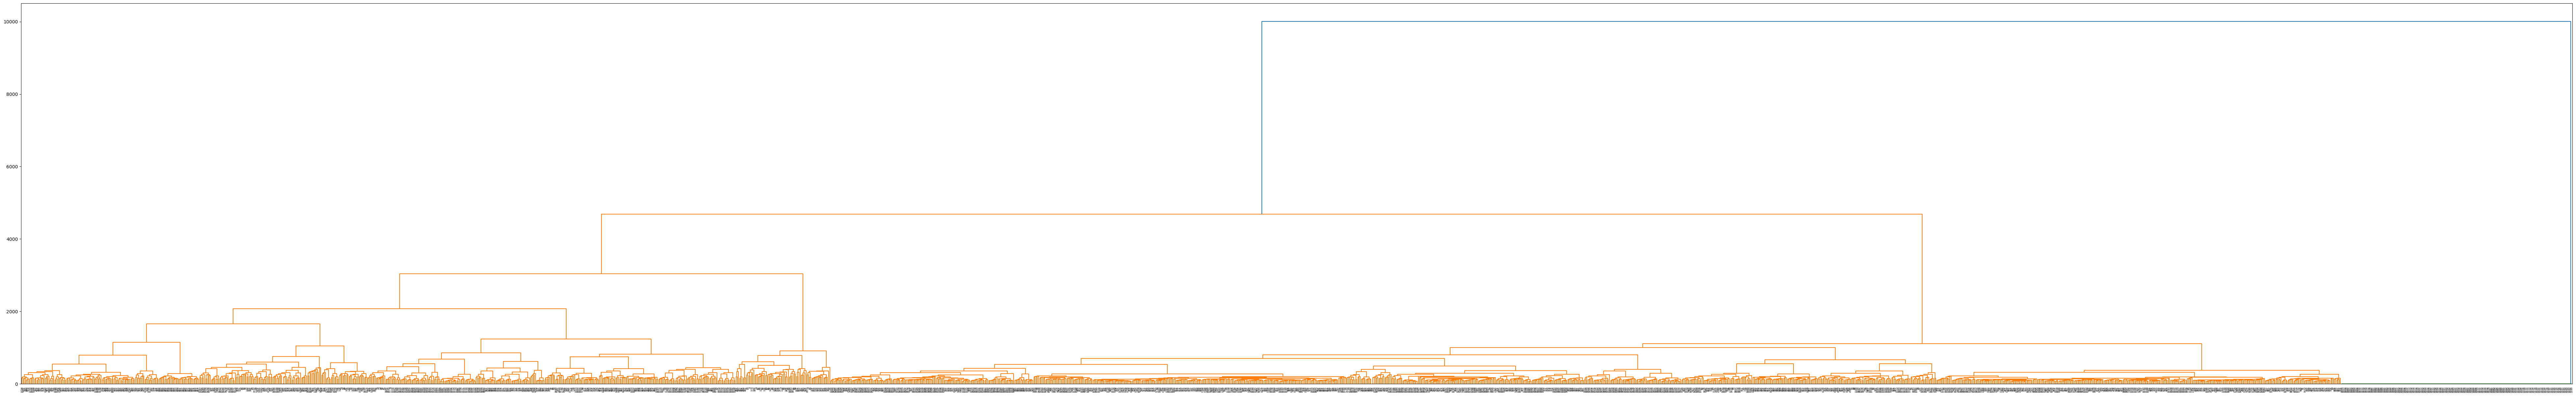

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(df, 'ward')

plt.figure(figsize=(100,15))

dendrogram(linked, orientation = 'top', distance_sort = "descending", show_leaf_counts = True)

plt.show()

In [92]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

cluster.fit_predict(df)

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 4, 1, ..., 3, 3, 3])

In [95]:
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # create linkage matrix and plotting dendrogram
    # creating counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
    



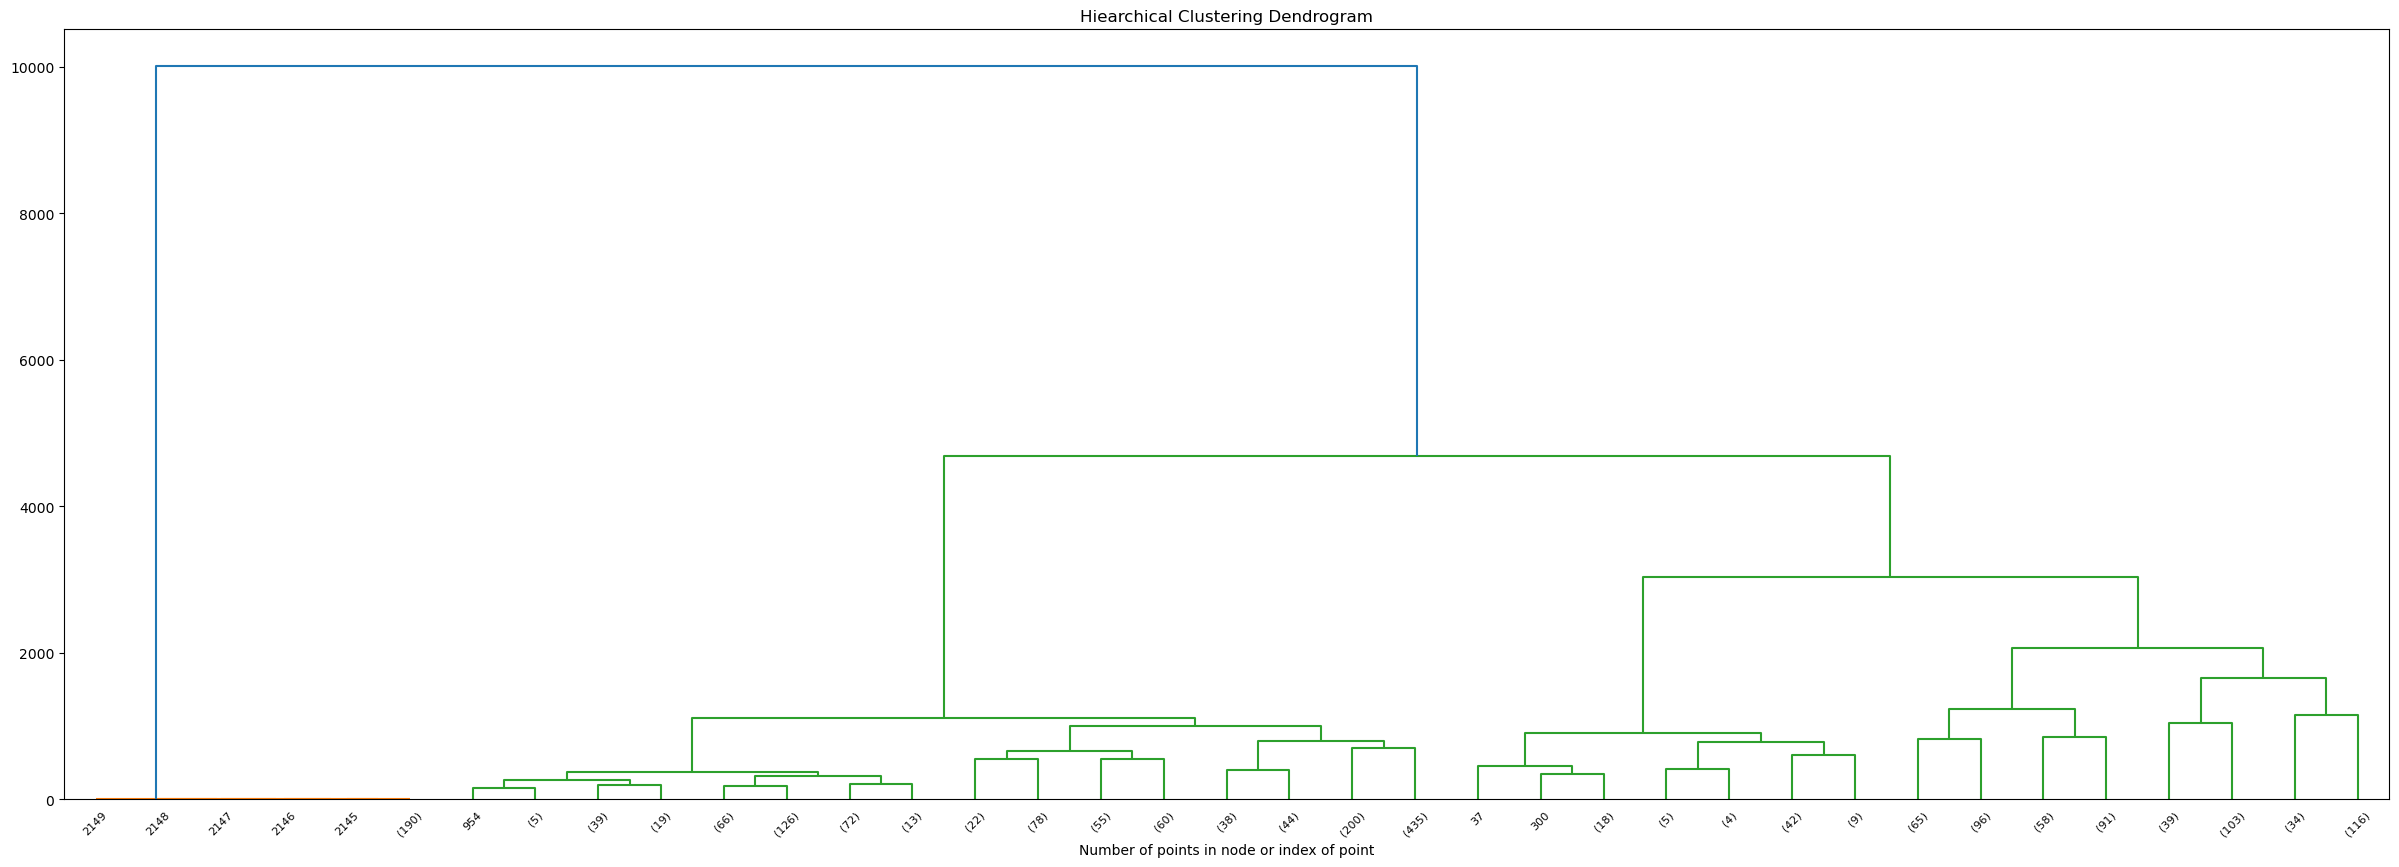

In [98]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)

model = model.fit(df)

plt.figure(figsize = (30, 10))
plt.title('Hiearchical Clustering Dendrogram')

plot_dendrogram(model, truncate_mode = 'level', p = 5)

plt.xlabel("Number of points in node or index of point")

plt.show()

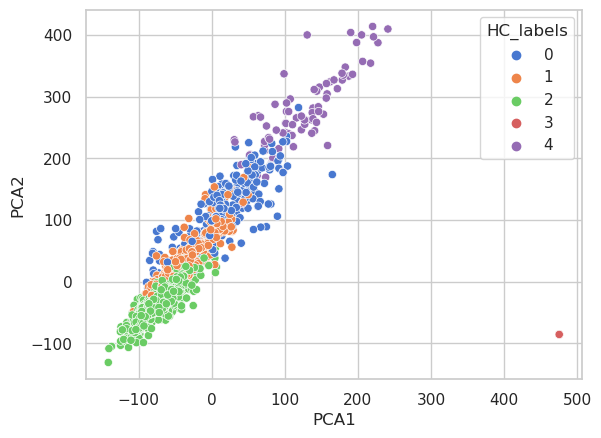

In [99]:
pca_df["HC_labels"] = cluster.labels_
pca_df['HC_labels'] = pca_df.HC_labels.astype('category')
sns.set(style = 'whitegrid', palette = 'muted')

ax  = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'HC_labels', data = pca_df)

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


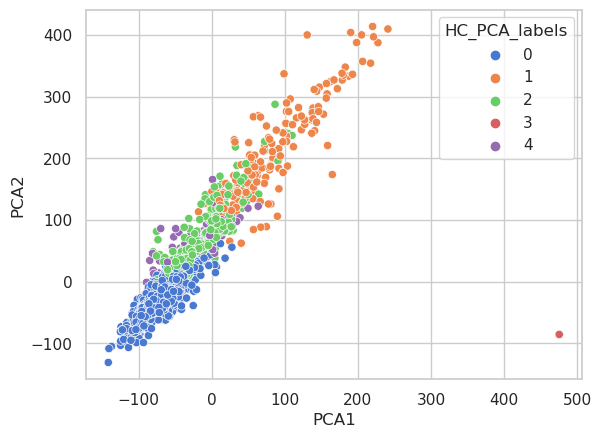

In [100]:
# this time compute PCA and then conduct hiearchical clustering on the PCA componenets (50 principal components here)


pca = PCA(n_components=50)
X = pca.fit(df).transform(df)


cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)

pca_df["HC_PCA_labels"] = cluster.labels_
pca_df['HC_PCA_labels'] = pca_df.HC_PCA_labels.astype('category')

sns.set(style = 'whitegrid', palette = 'muted')
ax = sns.scatterplot( x = 'PCA1', y = 'PCA2', hue = 'HC_PCA_labels', data = pca_df)

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


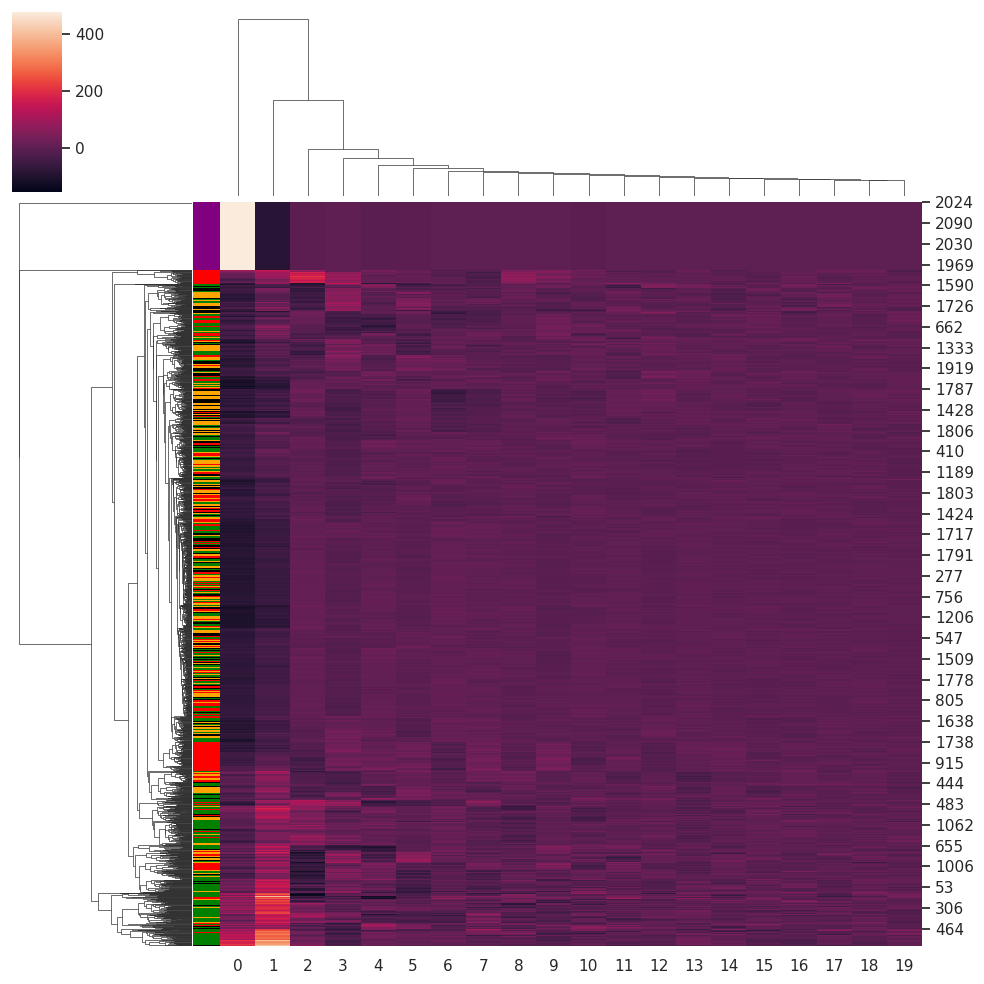

In [115]:
#need to do heatmap of common components

target = pd.Series(target)
pca = PCA(n_components = 20)

Y = pca.fit(df).transform(df)
Y = pd.DataFrame(Y)

k = ["green", "red", "orange", "black", "purple", "blue", "yellow"]

lut = dict(zip(target.unique(), k))
row_colors = target.map(lut)

g = sns.clustermap(Y, row_colors = row_colors)

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


kmeans=  KMeans(init = "random", n_clusters = 5, n_init = 10, max_iter = 300, random_state = 42)
kmeans.fit_predict(df)

print(kmeans.inertia_)
print(kmeans.cluster_centers_)


31749139.749944564
[[ 2.09886476  1.1666497  -0.11998685 ...  2.06829657  1.33655564
  -0.89292228]
 [ 5.          5.          5.         ...  5.          5.
   5.        ]
 [ 4.55384746  1.55437823 -1.83511971 ...  5.46498619  3.06245477
   0.18518509]
 [ 0.09587241 -0.09978675 -0.14770925 ... -0.05125963 -0.00921071
   0.07160392]
 [ 1.18213409  0.43363058 -1.56331884 ...  1.45493618  1.60876867
   0.39121908]]


AttributeError: 'KMeans' object has no attribute 'n_iter'

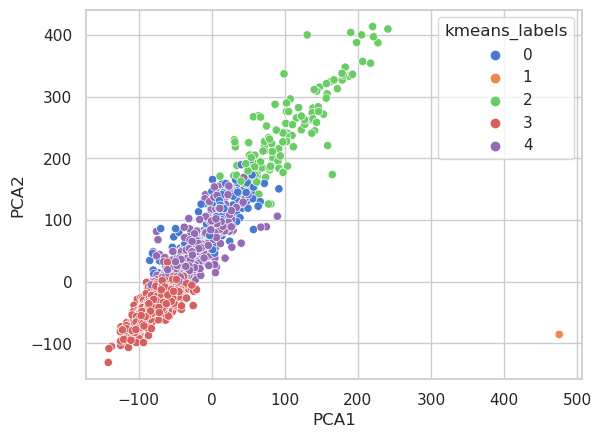

In [108]:
pca_df["kmeans_labels"] = kmeans.labels_
pca_df['kmeans_labels'] = pca_df.kmeans_labels.astype('category')
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'kmeans_labels', data = pca_df)

In [122]:
pca_df

x    y name  label        PCA1        PCA2  Drug
0     NaN  NaN  NaN      0  115.827568  265.463278     1
1     NaN  NaN  NaN      0   72.621585  212.427331     1
2     NaN  NaN  NaN      0  -28.422289   42.851033     1
3     NaN  NaN  NaN      0   52.685193  206.189836     1
4     NaN  NaN  NaN      0   31.915290  151.845418     1
...   ...  ...  ...    ...         ...         ...   ...
2145  NaN  NaN  NaN      4  475.565522  -85.704746     5
2146  NaN  NaN  NaN      4  475.565522  -85.704746     5
2147  NaN  NaN  NaN      4  475.565522  -85.704746     5
2148  NaN  NaN  NaN      4  475.565522  -85.704746     5
2149  NaN  NaN  NaN      4  475.565522  -85.704746     5

[2150 rows x 7 columns]

In [119]:
compound_df_5 = cparse.parse("/data3/balaji/cmap/level5_beta_trt_cp_n720216x12328.gctx")

In [120]:
compound_df_5 = compound_df_5.data_df

In [121]:
compound_df_5

cid    ABY001_A375_XH:BRD-A61304759:0.625:24  \
rid                                            
10                                  -0.02435   
100                                  0.70715   
1000                                -1.53065   
10000                               -0.69105   
10001                                0.79380   
...                                      ...   
9990                                 1.08165   
9991                                 1.47585   
9992                                -0.32150   
9993                                -0.18240   
9997                                -0.07220   

cid    ABY001_A375_XH:BRD-A61304759:0.625:3  \
rid                                           
10                                 0.296080   
100                               -0.855923   
1000                              -0.976824   
10000                             -2.368536   
10001                              0.836673   
...                                     ...   
9990                               0.704205   
9991                               0.752289   
9992                               0.300397   
9993                               1.697658   
9997                               0.649668   

cid    ABY001_A375_XH:BRD-A61304759:10:24  ABY001_A375_XH:BRD-A61304759:10:3  \
rid                                                                            
10                              -0.341348                           0.826170   
100                              1.393475                          -0.658590   
1000                            -0.938388                          -1.117790   
10000                            0.033532                          -1.195679   
10001                            0.776472                          -0.274785   
...                                   ...                                ...   
9990                             0.408181                           0.867923   
9991                            -0.884945                          -0.410739   
9992                            -0.092195                          -0.418060   
9993                             0.946795                           1.515939   
9997                             0.047901                           0.173782   

cid    ABY001_A375_XH:BRD-A61304759:2.5:24  \
rid                                          
10                                0.578998   
100                               1.990247   
1000                             -0.241152   
10000                            -0.269050   
10001                             0.458225   
...                                    ...   
9990                              1.087075   
9991                              0.739115   
9992                              1.426025   
9993                              0.334415   
9997                              0.143768   

cid    ABY001_A375_XH:BRD-A61304759:2.5:3  \
rid                                         
10                              -0.226271   
100                             -0.816748   
1000                            -0.236283   
10000                           -0.257835   
10001                            0.445442   
...                                   ...   
9990                            -0.409982   
9991                            -0.728025   
9992                            -0.274961   
9993                            -0.302074   
9997                             0.989755   

cid    ABY001_A375_XH:BRD-A90490067:0.625:24  \
rid                                            
10                                 -0.017583   
100                                -0.126917   
1000                                1.859383   
10000                               0.009758   
10001                              -0.515106   
...                                      ...   
9990                               -0.747536   
9991                                0.447379   
9992                                1.424459   
9993     

In [127]:
pd.set_option('display.max_columns', 37)

In [131]:
MCF7_siginfo = siginfo[siginfo['cell_iname'] == 'MCF7']
MCF7_siginfo_is_hiq = MCF7_siginfo[MCF7_siginfo['is_hiq'] == 1]

In [137]:
MCF7_siginfo_is_hiq_ids = MCF7_siginfo_is_hiq['sig_id'].tolist()

In [139]:
MCF7_siginfo_is_hiq_ids

['HDAC002_MCF7_6H:BRD-K54343811-001-01-1:10',
 'HDAC002_MCF7_6H:BRD-K29313308-001-02-4:5',
 'ERAM001_MCF7_24H:BRD-M90295809:8.9',
 'HOG001_MCF7_6H:BRD-A75409952-001-01-6:0.1235',
 'DOSBIO001_MCF7_24H:BRD-K08317416:10.1576',
 'POL001_MCF7_24H:F22',
 'OFL001_MCF7_96H:J17',
 'HOG003_MCF7_6H:BRD-K81418486-001-32-7:0.3704',
 'CPD002_MCF7_24H:BRD-K26104851-001-15-3:10',
 'CYT001_MCF7_4H:CMAP-CYT-C5993:50',
 'MET001_MCF7_XH:BRD-A19037878:10:24',
 'LPROT002_MCF7_6H:BRD-K07691486:10',
 'HOG002_MCF7_24H:BRD-A35588707-001-04-8:1.11',
 'PCL001_MCF7_24H:BRD-K88378636:1.11',
 'ENR001_MCF7_24H:G02',
 'POL001_MCF7_24H:A13',
 'POL001_MCF7_24H:P15',
 'HOG003_MCF7_6H:BRD-K22503835-001-06-0:3.33',
 'CPD002_MCF7_24H:BRD-K71289571-001-07-2:10',
 'CPD003_MCF7_24H:M21',
 'OFL001_MCF7_96H:J13',
 'POL001_MCF7_24H:N15',
 'HDAC001_MCF7_24H:BRD-K88742110-001-01-2:2.5',
 'CYT001_MCF7_4H:CMAP-CYT-SRP3055:100',
 'HOG002_MCF7_24H:BRD-A61304759-001-01-0:1.11',
 'PCL001_MCF7_24H:BRD-K92428232:10',
 'ERAM001_MCF7_24H:BRD

In [142]:
MCF7_siginfo_is_hiq_ids_in_df = []
for i in MCF7_siginfo_is_hiq_ids:
    if i in compound_df_5.columns:
        MCF7_siginfo_is_hiq_ids_in_df.append(i)


In [144]:
len(MCF7_siginfo_is_hiq_ids_in_df)

12680

In [184]:
kmeans_df_MCF7 = compound_df_5[MCF7_siginfo_is_hiq_ids_in_df]

In [150]:
kmeans=  KMeans(init = "random", n_clusters = 5, n_init = 10, max_iter = 300, random_state = 42)
kmeans.fit_predict(kmeans_df_MCF7)

print(kmeans.inertia_)
print(kmeans.cluster_centers_)


122834208.0
[[-0.07617262 -0.14361192  0.0324211  ... -0.0746347  -0.04097983
  -0.52167517]
 [ 0.5192836   0.17032424 -0.427235   ... -0.360938   -0.2906102
   0.95788074]
 [ 0.07916175 -0.10548466 -0.09172633 ...  0.14046732  0.01523905
   0.21793944]
 [ 0.25159782  0.09037998 -0.1492966  ... -0.15169996 -0.09835628
   0.4469031 ]
 [-0.11699963  0.1141773   0.01475146 ... -0.52683663 -0.20746522
  -1.0447333 ]]


In [153]:
kmeans.labels_

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

In [154]:
# just clustered by gene

kmeans_df_MCF7['predictions'] = kmeans.labels_

/tmp/ipykernel_21449/3549588302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_df_MCF7['predictions'] = kmeans.labels_


In [183]:
kmeans_df_MCF7

array([[ 0.91928695,  0.3434435 , -0.56104705, ...,  0.17847122,
         0.41581541, -0.56502745],
       [ 0.18576426, -0.04538162,  0.16411247, ..., -0.44849518,
        -0.10604291, -0.56502745],
       [-0.60029318, -0.65209505,  0.44540761, ...,  1.65692957,
        -1.29242877, -1.41377344],
       ...,
       [ 0.27133873, -0.5496172 ,  0.59305582, ..., -0.73995651,
         0.86575166, -0.56502745],
       [ 0.33545627, -0.82134496,  0.74325019, ..., -1.74261119,
         1.35388996, -0.56502745],
       [-0.06171823,  1.40498109, -0.52198808, ..., -1.00774507,
         0.34552156, -1.41377344]])

In [ ]:
# need to do PCA first, can't just do kmeans because then I choose choose two genes randomly

In [157]:
from sklearn.preprocessing import StandardScaler

kmeans_df_MCF7 = StandardScaler().fit_transform(kmeans_df_MCF7)

In [158]:
kmeans_df_MCF7

array([[ 0.91928695,  0.3434435 , -0.56104705, ...,  0.17847122,
         0.41581541, -0.56502745],
       [ 0.18576426, -0.04538162,  0.16411247, ..., -0.44849518,
        -0.10604291, -0.56502745],
       [-0.60029318, -0.65209505,  0.44540761, ...,  1.65692957,
        -1.29242877, -1.41377344],
       ...,
       [ 0.27133873, -0.5496172 ,  0.59305582, ..., -0.73995651,
         0.86575166, -0.56502745],
       [ 0.33545627, -0.82134496,  0.74325019, ..., -1.74261119,
         1.35388996, -0.56502745],
       [-0.06171823,  1.40498109, -0.52198808, ..., -1.00774507,
         0.34552156, -1.41377344]])

In [186]:
from sklearn.decomposition import PCA
pca = PCA(n_components = .3)
principalComponents = pca.fit_transform(kmeans_df_MCF7)


In [187]:
pca.explained_variance_ratio_

array([0.25091422, 0.10630505], dtype=float32)

In [ ]:
len(pca.components_[0])

12681

In [188]:
pca_df = pd.DataFrame()
pca_df['PCA1'] = pca.components_[0]
pca_df['PCA2'] = pca.components_[1]
pca_df["kmeans_labels"] = kmeans.labels_
pca_df['kmeans_labels'] = pca_df.kmeans_labels.astype('category')
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'kmeans_labels', data = pca_df)

ValueError: Length of values (12328) does not match length of index (12680)

In [341]:
def graphScatter(x, y, title = ""):

    plt.rcParams.update({'font.size': 22})

    
    plt.axhline(0, color='black', linestyle='-')
    plt.axvline(0, color='black', linestyle='-')
    plt.scatter(x, y, s= 10, alpha = 0.05)

    corr = np.corrcoef(x, y)[0, 1]
    
    m, b = np.polyfit(x, y, deg=1)
    # if cluster == False:
    #     plt.text(0.75, 0.95, f'Correlation: {corr:.2f}', ha='center', va='top', transform=plt.gca().transAxes)
    #     plt.plot(x, m*x + b, color='red')

    #     plt.text(0.75, 0.85, f'Slope of Line of Best Fit: {m:.2f}', ha='center', va='top', transform=plt.gca().transAxes)
    #     plt.text(0.75, 0.80, f'y-intercept: {b:.2f}', ha='center', va='top', transform=plt.gca().transAxes)

    plt.scatter(x, y, s= 10, alpha = 0.2, color = 'darkblue')

    x = pd.DataFrame(x)
    y = pd.DataFrame(y)
    plt.xlabel(f"{x.columns}")
    plt.ylabel(f"{y.columns}")

    plt.title(f"{title}")
    plt.rcParams.update({'font.size': 22})

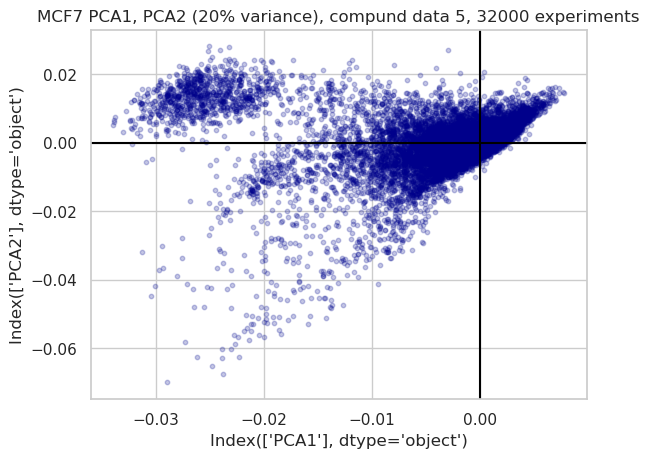

In [193]:
graphScatter(x= pca_df.iloc[:,0], y = pca_df.iloc[:,1], title = "MCF7 PCA1, PCA2 (20% variance), compund data 5, 32000 experiments")

InvalidIndexError: (slice(None, None, None), slice(None, 2, None))

In [242]:
kmeans=  KMeans(init = "random", n_clusters = 3, n_init = 10, max_iter = 300, random_state = 42)
kmeans.fit_predict(pca_df.iloc[:,:2])

print(kmeans.inertia_)
print(kmeans.cluster_centers_)


0.6214446425437927
[[-0.02331895  0.0131386 ]
 [-0.01068185 -0.01537795]
 [-0.00118775  0.00118545]]


In [243]:
pca_df['predictions'] = kmeans.labels_

In [244]:
pca_df

PCA1      PCA2  predictions
0     -0.002785 -0.005348            2
1     -0.000622 -0.003368            2
2      0.001913  0.003246            2
3     -0.004695 -0.011358            1
4      0.000786  0.002013            2
...         ...       ...          ...
12675 -0.000144 -0.000201            2
12676  0.001168  0.003967            2
12677 -0.000654  0.005516            2
12678  0.000234  0.003057            2
12679 -0.008681 -0.010024            1

[12680 rows x 3 columns]

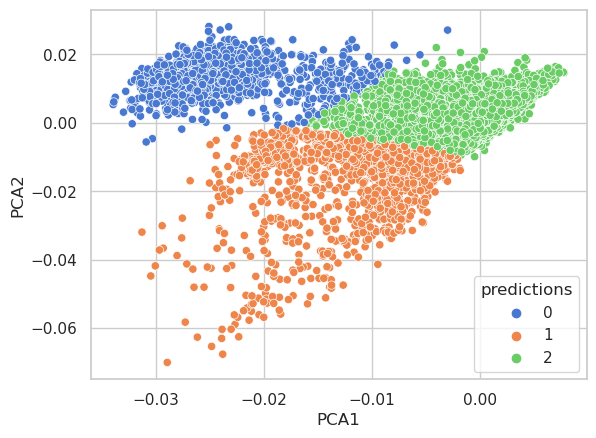

In [245]:
pca_df['predictions'] = pca_df.predictions.astype('category')
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'predictions', data = pca_df)

In [219]:
pca_df_elbow_method = pca_df.iloc[:,:2]


/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

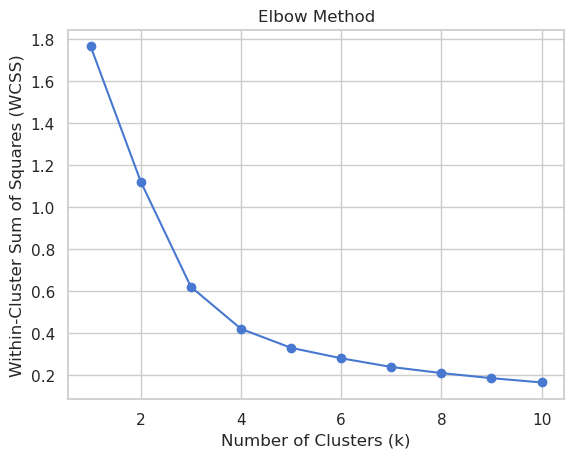

In [220]:
k_values = range(1, 11)

# Initialize an empty list to store the WCSS values for each cluster number
wcss_values = []

# Iterate over each cluster number and calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df_elbow_method)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

In [246]:
pca_df

PCA1      PCA2 predictions
0     -0.002785 -0.005348           2
1     -0.000622 -0.003368           2
2      0.001913  0.003246           2
3     -0.004695 -0.011358           1
4      0.000786  0.002013           2
...         ...       ...         ...
12675 -0.000144 -0.000201           2
12676  0.001168  0.003967           2
12677 -0.000654  0.005516           2
12678  0.000234  0.003057           2
12679 -0.008681 -0.010024           1

[12680 rows x 3 columns]

In [251]:
kmean_df_MCF7_genes_columns = kmeans_df_MCF7.transpose()

In [253]:
from sklearn.decomposition import PCA
pca = PCA(n_components = .3)
principalComponents = pca.fit_transform(kmean_df_MCF7_genes_columns)

In [256]:
pca.explained_variance_ratio_

array([0.22854196, 0.12051726], dtype=float32)

In [257]:
pca_df_ge

PCA1      PCA2 predictions
0     -0.002785 -0.005348           2
1     -0.000622 -0.003368           2
2      0.001913  0.003246           2
3     -0.004695 -0.011358           1
4      0.000786  0.002013           2
...         ...       ...         ...
12675 -0.000144 -0.000201           2
12676  0.001168  0.003967           2
12677 -0.000654  0.005516           2
12678  0.000234  0.003057           2
12679 -0.008681 -0.010024           1

[12680 rows x 3 columns]

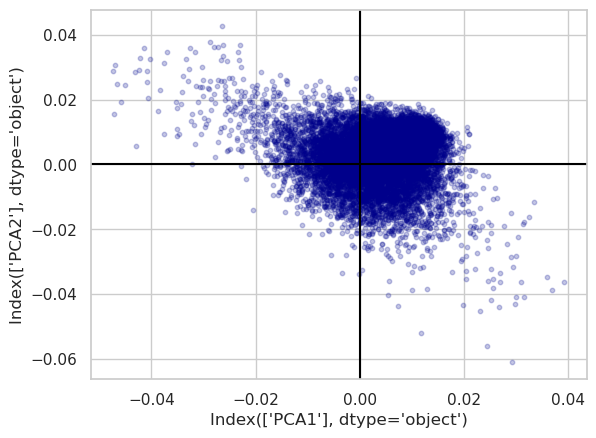

In [261]:
pca_df_transpose = pd.DataFrame()
pca_df_transpose['PCA1'] = pca.components_[0]
pca_df_transpose['PCA2'] = pca.components_[1]
graphScatter(x= pca_df_transpose.iloc[:,0], y = pca_df_transpose.iloc[:,1])

In [259]:
pca_df_transpose

PCA1      PCA2
0      0.010130  0.007221
1      0.011009  0.000286
2     -0.000923 -0.004533
3      0.004542  0.010416
4     -0.000834 -0.014441
...         ...       ...
12323  0.014242 -0.004805
12324 -0.003417 -0.011698
12325  0.010334  0.008958
12326  0.011346  0.005390
12327 -0.002271  0.005664

[12328 rows x 2 columns]

In [260]:
pca_df

PCA1      PCA2 predictions
0     -0.002785 -0.005348           2
1     -0.000622 -0.003368           2
2      0.001913  0.003246           2
3     -0.004695 -0.011358           1
4      0.000786  0.002013           2
...         ...       ...         ...
12675 -0.000144 -0.000201           2
12676  0.001168  0.003967           2
12677 -0.000654  0.005516           2
12678  0.000234  0.003057           2
12679 -0.008681 -0.010024           1

[12680 rows x 3 columns]

In [265]:
pca_250000 = PCA(n_components = 2)
principalComponents = pca_250000.fit_transform(compound_df_5.iloc[:,:25000])


In [266]:
pca_250000.explained_variance_ratio_

array([0.23849578, 0.03706753], dtype=float32)

In [272]:
pca_250000.components_

array([[-2.4423527e-03, -2.6894428e-03, -3.0598147e-03, ...,
         2.4977950e-03,  1.7169779e-03,  3.7461836e-04],
       [ 1.6759265e-03,  1.0247867e-03,  5.4292097e-03, ...,
         8.8818902e-05, -2.3531901e-04, -2.8865696e-03]], dtype=float32)

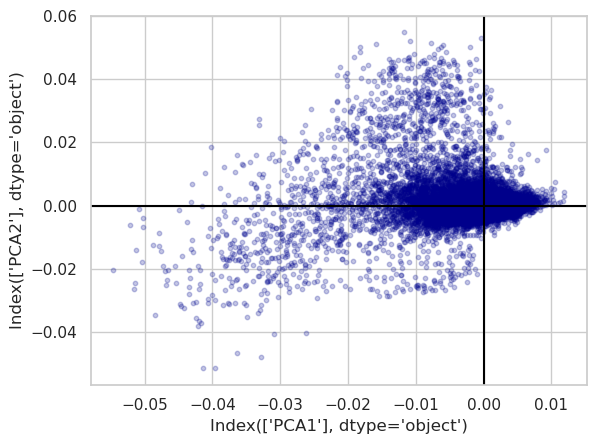

In [276]:
first_25000_pca = pd.DataFrame()
first_25000_pca['PCA1'] = pca_250000.components_[0]
first_25000_pca['PCA2'] = pca_250000.components_[1]
graphScatter(x=first_25000_pca.iloc[:,0], y= first_25000_pca.iloc[:,1])

In [309]:
all_cp_pca_standardized = StandardScaler().fit_transform(compound_df_5.iloc[:,:].transpose())

In [306]:
all_cp_pca_standardized

PCA1      PCA2
0      0.011495 -0.004112
1      0.004206  0.001086
2     -0.007223  0.000838
3      0.004688 -0.004820
4     -0.004359  0.016378
...         ...       ...
12323  0.013665  0.010751
12324 -0.002708  0.004600
12325  0.015765 -0.007301
12326  0.009226 -0.001471
12327  0.000923 -0.007537

[12328 rows x 2 columns]

In [310]:
pca_all = PCA(n_components = 2)
principalComponents = pca_all.fit_transform(all_cp_pca_standardized)

In [311]:
pca_all.explained_variance_ratio_

array([0.22544606, 0.03205985])

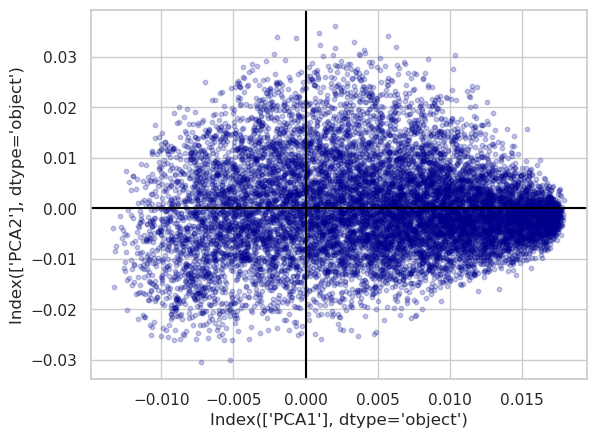

In [312]:
pca_all_stdrzed = pd.DataFrame()
pca_all_stdrzed['PCA1'] = pca_all.components_[0]
pca_all_stdrzed['PCA2'] = pca_all.components_[1]
graphScatter(x=pca_all_stdrzed.iloc[:,0], y= pca_all_stdrzed.iloc[:,1])

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

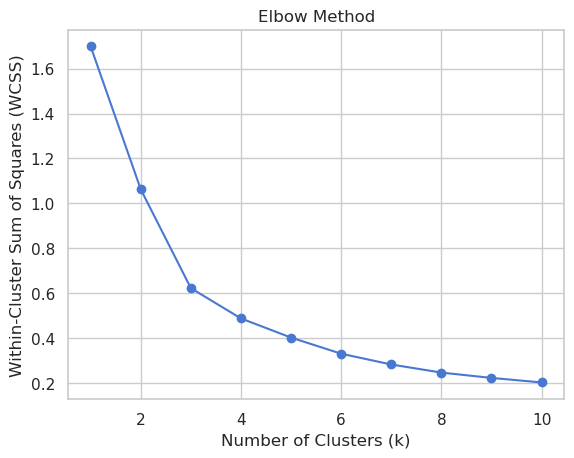

In [313]:
k_values = range(1, 11)

# Initialize an empty list to store the WCSS values for each cluster number
wcss_values = []

# Iterate over each cluster number and calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_all_stdrzed)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

In [320]:
kmeans=  KMeans(init = "random", n_clusters = 50, n_init = 10, max_iter = 300, random_state = 42)
kmeans.fit_predict(pca_all_stdrzed.iloc[:,:2])

print(kmeans.inertia_)
print(kmeans.cluster_centers_)

0.04237040504813194
[[ 9.8481327e-03 -3.1946304e-03]
 [-9.6321404e-03 -4.4906307e-03]
 [-7.1050045e-03 -2.1509711e-02]
 [-4.3143160e-03 -9.7725680e-03]
 [-1.9663363e-03 -6.1316025e-03]
 [ 6.1204755e-03  2.5460662e-03]
 [ 1.6370656e-02 -2.9038731e-03]
 [-1.2085428e-03 -4.5940190e-04]
 [-8.0265291e-03 -1.5367073e-02]
 [ 9.9222045e-03  1.0579491e-02]
 [-2.8030775e-03  1.1691611e-02]
 [ 1.1215666e-03  2.9035327e-03]
 [ 1.3070576e-02 -8.9960191e-03]
 [ 1.6478619e-02 -2.0618150e-05]
 [-7.0344466e-03  7.9285558e-03]
 [ 1.4476854e-02  2.7368928e-03]
 [ 6.2053986e-03  2.1927465e-02]
 [-7.2284178e-03  1.3996080e-02]
 [ 9.4386227e-03 -7.2097648e-03]
 [ 5.9848558e-04 -1.9958334e-02]
 [-8.6485073e-03  2.5254372e-03]
 [ 9.5343459e-03  1.5719144e-02]
 [ 5.6819953e-03 -9.5764343e-03]
 [-1.8702117e-03  2.2143435e-02]
 [ 3.7475792e-03 -9.6665847e-04]
 [ 3.6625941e-03  1.6535522e-02]
 [ 1.3230553e-02  7.0512313e-03]
 [-5.6898962e-03 -5.7274982e-04]
 [ 1.0458389e-02  3.7797603e-03]
 [ 5.2122315e-03 -1.477

In [321]:
pca_all_stdrzed['predictions'] = kmeans.labels_

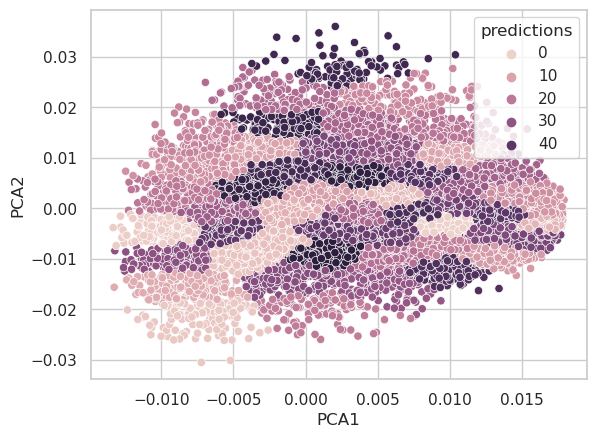

In [322]:
pca_df['predictions'] = pca_df.predictions.astype('category')
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'predictions', data = pca_all_stdrzed)

In [325]:
# what if I only look at high quality data?

siginfo_is_hiq_all = siginfo[siginfo['is_hiq'] == 1]
list_of_all_sig = siginfo_is_hiq_all['sig_id'].tolist()

In [328]:
compound_hiq_all = []
for i in list_of_all_sig:
    if i in compound_df_5.columns:
        compound_hiq_all.append(i)

In [330]:
compound_hiq_data = compound_df_5[compound_hiq_all]

In [ ]:
compound_hiq_data_standardized = StandardScaler().fit_transform(compound_hiq_data)

In [349]:
"Takes in dataframe for clustering and returns graph of PCA 1, 2 as well as elbow curve for optimal clusters"
def preKMeansClustering(df):
    df_standardized = StandardScaler().fit_transform(df)
    pca = PCA(n_components = 2)
    principalComponents = pca.fit_transform(df_standardized)
    print("Variance for PCA: ", pca.explained_variance_ratio_)
    
    pca_df = pd.DataFrame()
    pca_df['PCA1'] = pca.components_[0]
    pca_df['PCA2'] = pca.components_[1]
    print(graphScatter(x=pca_df.iloc[:,0], y= pca_df.iloc[:,1]))

    # elbow curve

    k_values = range(1, 11)

    # Initialize an empty list to store the WCSS values for each cluster number
    wcss_values = []

    # Iterate over each cluster number and calculate WCSS
    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(pca_df)
        wcss_values.append(kmeans.inertia_)

    # Plot the WCSS values against the number of clusters
    plt.plot(k_values, wcss_values, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method')
    plt.show()

    return pca_df
    

    
    
    

Variance for PCA:  [0.11845946 0.04075807]
None


/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

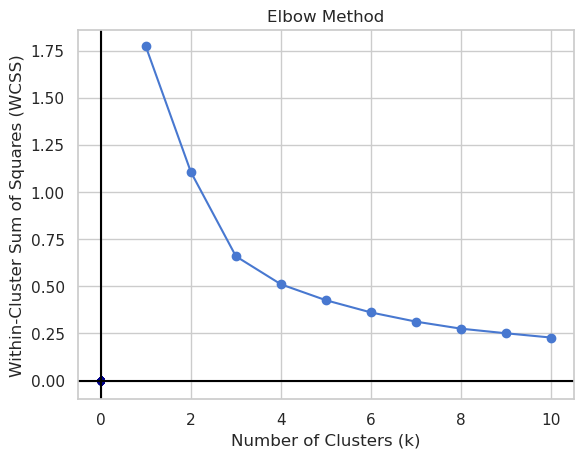

In [352]:
pca_hiq_df = preKMeansClustering(compound_hiq_data)

In [357]:
# Peforms kMeansClustering. Needs df with PCA values and number of clusters.
def kMeansClustering(pca_df, num_clusters = 3):
    kmeans=  KMeans(init = "random", n_clusters = num_clusters, n_init = 10, max_iter = 300, random_state = 42)
    kmeans.fit_predict(pca_df.iloc[:,:2])
    temp_df = pca_df
    temp_df['predictions'] = kmeans.labels_

    temp_df['predictions'] = temp_df.predictions.astype('category')
    ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'predictions', data = temp_df)

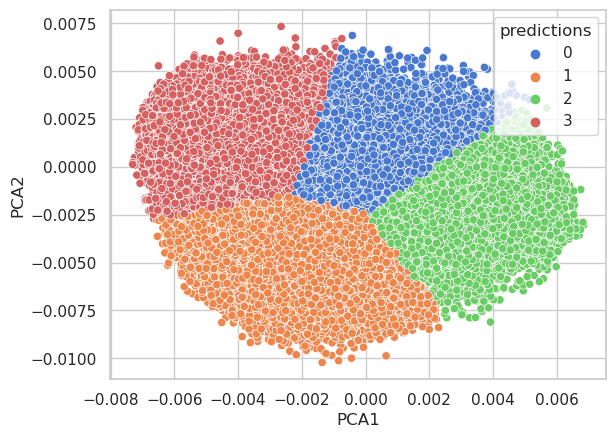

In [358]:
kMeansClustering(pca_hiq_df)

In [379]:
# lets use t-SNE instead of PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(pca_df)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12680 samples in 0.007s...
[t-SNE] Computed neighbors for 12680 samples in 0.793s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12680
[t-SNE] Computed conditional probabilities for sample 2000 / 12680
[t-SNE] Computed conditional probabilities for sample 3000 / 12680
[t-SNE] Computed conditional probabilities for sample 4000 / 12680
[t-SNE] Computed conditional probabilities for sample 5000 / 12680
[t-SNE] Computed conditional probabilities for sample 6000 / 12680
[t-SNE] Computed conditional probabilities for sample 7000 / 12680
[t-SNE] Computed conditional probabilities for sample 8000 / 12680
[t-SNE] Computed conditional probabilities for sample 9000 / 12680
[t-SNE] Computed conditional probabilities for sample 10000 / 12680
[t-SNE] Computed conditional probabilities for sample 11000 / 12680
[t-SNE] Computed conditional probabilities for sample 12000 / 12680
[t-SNE] Computed conditional probabilities for sa

/tmp/ipykernel_21449/3255504409.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

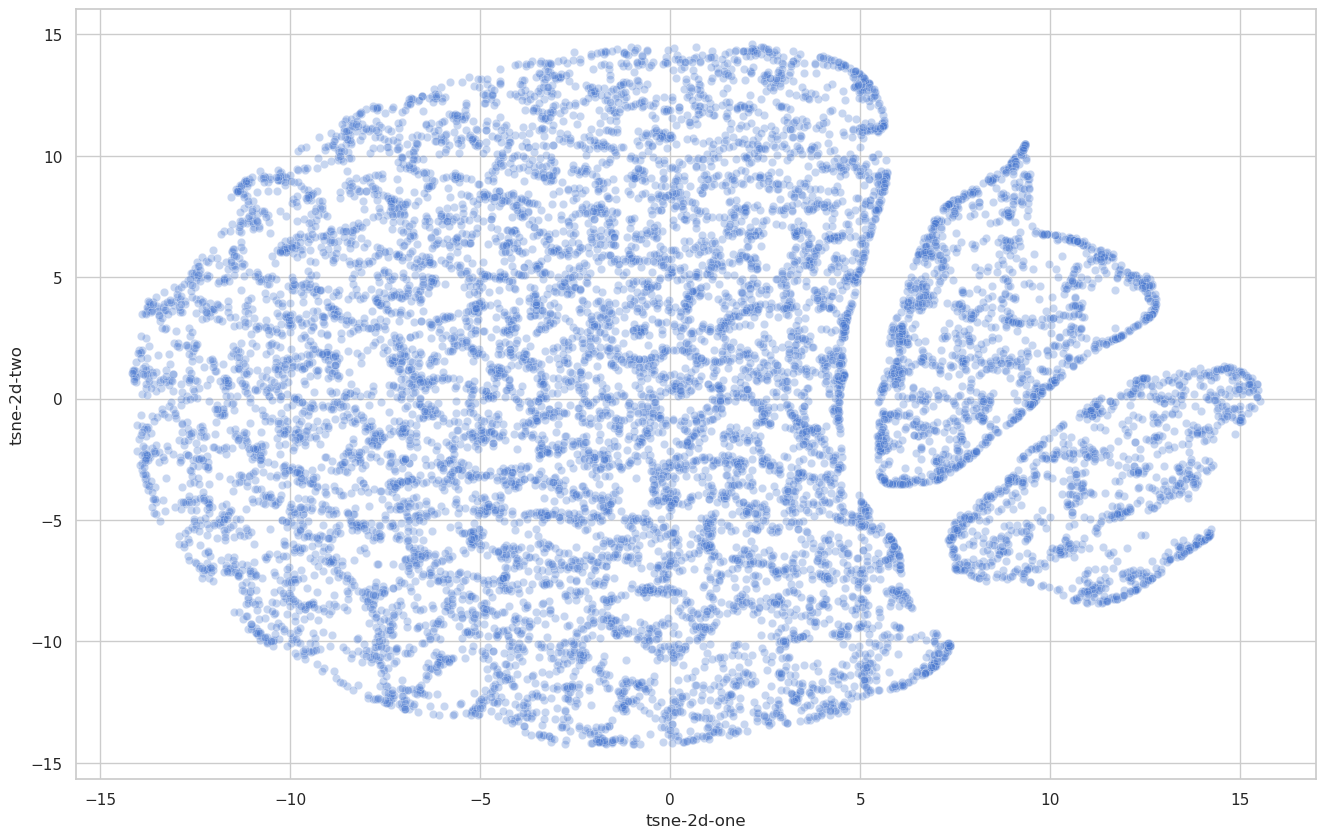

In [380]:
tsne_results_df = pd.DataFrame()
tsne_results_df['tsne-2d-one'] = tsne_results[:,0]
tsne_results_df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    # hue="tsne-2d-one",
    palette=sns.color_palette("hls", 10),
    data=tsne_results_df,
    legend="full",
    alpha=0.3
)

In [395]:
df_standardized = StandardScaler().fit_transform(compound_hiq_data.transpose())
pca = PCA(n_components = 50)
principalComponents = pca.fit_transform(df_standardized)

In [403]:
len(df_standardized)

126048

In [396]:
tsne_pca_df = pd.DataFrame()
for i in range(len(pca.components_)):
    tsne_pca_df[f'PCA{i}'] = pca.components_[i]
   

In [399]:
tsne_pca_df

PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0      0.012552 -0.003135 -0.002817  0.003706  0.003997 -0.002071 -0.004001   
1      0.005200 -0.001509  0.008831  0.012135  0.000108 -0.002803 -0.004007   
2     -0.009417  0.002684 -0.001090  0.006202  0.006195 -0.020298 -0.011019   
3      0.005430 -0.004686 -0.005292 -0.009264  0.003691  0.004478 -0.012212   
4     -0.004830  0.023542 -0.003544  0.004299  0.006974  0.002690 -0.001379   
...         ...       ...       ...       ...       ...       ...       ...   
12323  0.013173  0.012181  0.003474 -0.005003  0.000152 -0.008735 -0.005061   
12324 -0.005816  0.014064 -0.012105 -0.000103  0.010868 -0.010864 -0.017166   
12325  0.015131 -0.003779 -0.006691 -0.001218 -0.001581 -0.006792  0.001660   
12326  0.010111 -0.005102  0.010123  0.004761 -0.004055  0.011185  0.017966   
12327  0.000915 -0.008139 -0.006312  0.001626 -0.013176  0.014884  0.018786   

           PCA7      PCA8      PCA9     PCA10     PCA11     PCA12     PCA13  \
0     -0.005271 -0.011959  0.003576  0.007288  0.005184  0.006256 -0.004657   
1     -0.006269 -0.006493 -0.012901  0.003289  0.016502 -0.004433  0.011279   
2     -0.007066  0.003126  0.001831 -0.002057  0.005635  0.015335 -0.003091   
3      0.001578  0.014542 -0.005440  0.001368 -0.007808  0.024253  0.006254   
4      0.006707 -0.006326  0.009865 -0.013718  0.006596 -0.017086  0.009020   
...         ...       ...       ...       ...       ...       ...       ...   
12323  0.004314  0.002747  0.002404  0.002797  0.004145 -0.005001  0.008573   
12324 -0.004536  0.003895 -0.006684  0.009187  0.010212 -0.011661 -0.005790   
12325  0.005770  0.003638 -0.001537 -0.000810 -0.001758 -0.007279 -0.003146   
12326 -0.012835  0.003569 -0.016776  0.005631 -0.000863 -0.008133  0.023047   
12327  0.021532 -0.019954 -0.009352  0.002692  0.006271  0.004077 -0.000303   

          PCA14     PCA15     PCA16     PCA17  ...     PCA32     PCA33  \
0      0.004725  0.000809 -0.011678 -0.004760  ... -0.018230  0.006087   
1     -0.009951  0.003574 -0.008632 -0.001512  ... -0.004182 -0.016317   
2     -0.001873  0.020347 -0.005993  0.004006  ...  0.002256 -0.006838   
3      0.014144  0.020200  0.009238  0.002312  ...  0.015596  0.002960   
4      0.005656 -0.007618  0.004604  0.011054  ...  0.003216 -0.023350   
...         ...       ...       ...       ...  ...       ...       ...   
12323 -0.002081 -0.002641  0.006268  0.000949  ...  0.005320 -0.009214   
12324 -0.001502 -0.021655 -0.001009 -0.004464  ...  0.000329 -0.005621   
12325  0.006564 -0.001598 -0.000174 -0.010492  ...  0.006568 -0.000346   
12326 -0.012718 -0.014495 -0.005660 -0.001550  ...  0.001764 -0.004184   
12327 -0.019277 -0.003565 -0.008449 -0.008114  ... -0.015732 -0.004457   

          PCA34     PCA35     PCA36     PCA37     PCA38     PCA39     PCA40  \
0      0.010050  0.013094  0.009645 -0.001415  0.006196  0.011142  0.018842   
1      0.013757 -0.006704  0.023603 -0.028775 -0.006350  0.006451 -0.011713   
2     -0.011529  0.003755 -0.006355 -0.000686  0.014143 -0.007896  0.003845   
3      0.001617  0.011718  0.001418  0.000663 -0.004066 -0.007609 -0.011484   
4     -0.008103  0.011072  0.003469 -0.004617  0.003591  0.013860 -0.010403   
...         ...       ...       ...       ...       ...       ...       ...   
12323  0.009716 -0.003866  0.005976  0.008120  0.005726 -0.029392  0.004488   
12324 -0.012680  0.001038  0.004585  0.008551 -0.002892 -0.007259 -0.004238   
12325 -0.007948 -0.001631  0.000791 -0.006577 -0.006919  0.006458 -0.008438   
12326  0.000947 -0.003174 -0.006231  0.012296 -0.010179  0.005125  0.006486   
12327  0.002947  0.016316  0.000555  0.005765  0.017466 -0.005333 -0.006968   

          PCA41     PCA42     PCA43     PCA44     PCA45     PCA46     PCA47  \
0      0.003684 -0.009543 -0.010836  0.005282 -0.003288 -0.012952 -0.007618   
1     -0.005935  0.012080  0.005530 -0.009837  0.012414  0.005396 -0.009448   
2      0.003947  0.008922  0.006778 -0

PCA1      PCA2 predictions
0     -0.002785 -0.005348           2
1     -0.000622 -0.003368           2
2      0.001913  0.003246           2
3     -0.004695 -0.011358           1
4      0.000786  0.002013           2
...         ...       ...         ...
12675 -0.000144 -0.000201           2
12676  0.001168  0.003967           2
12677 -0.000654  0.005516           2
12678  0.000234  0.003057           2
12679 -0.008681 -0.010024           1

[12680 rows x 3 columns]

In [409]:
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 30, n_iter = 2000)
tsne_results = tsne.fit_transform(tsne_pca_df.iloc[:,:2])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12328 samples in 0.006s...
[t-SNE] Computed neighbors for 12328 samples in 0.248s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12328
[t-SNE] Computed conditional probabilities for sample 2000 / 12328
[t-SNE] Computed conditional probabilities for sample 3000 / 12328
[t-SNE] Computed conditional probabilities for sample 4000 / 12328
[t-SNE] Computed conditional probabilities for sample 5000 / 12328
[t-SNE] Computed conditional probabilities for sample 6000 / 12328
[t-SNE] Computed conditional probabilities for sample 7000 / 12328
[t-SNE] Computed conditional probabilities for sample 8000 / 12328
[t-SNE] Computed conditional probabilities for sample 9000 / 12328
[t-SNE] Computed conditional probabilities for sample 10000 / 12328
[t-SNE] Computed conditional probabilities for sample 11000 / 12328
[t-SNE] Computed conditional probabilities for sample 12000 / 12328
[t-SNE] Computed conditional probabilities for sam

/tmp/ipykernel_21449/4123868877.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

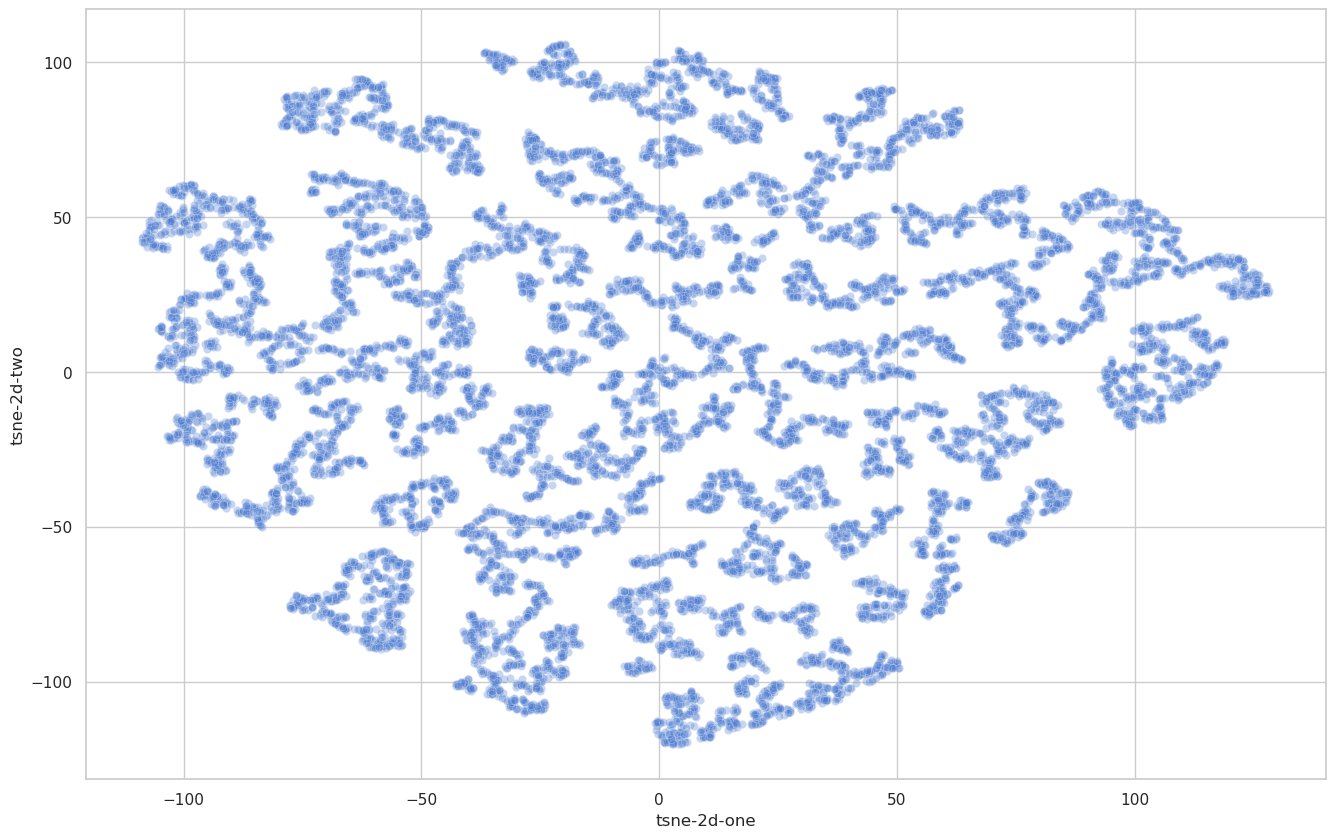

In [410]:
tsne_results_df_10 = pd.DataFrame()
tsne_results_df_10['tsne-2d-one'] = tsne_results[:,0]
tsne_results_df_10['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    # hue="tsne-2d-one",
    palette=sns.color_palette("hls", 10),
    data=tsne_results_df_10,
    legend="full",
    alpha=0.3
)

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

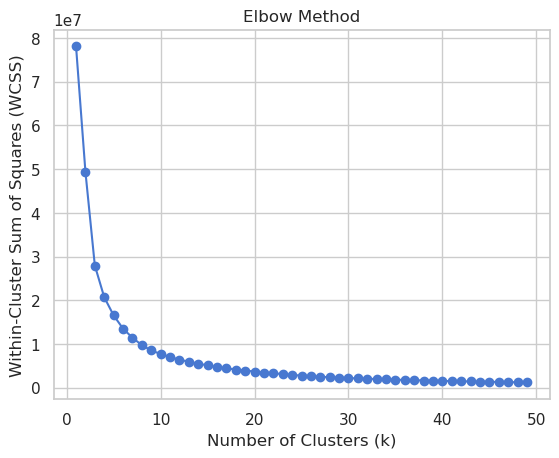

In [414]:

  # elbow curve

k_values = range(1, 50)

# Initialize an empty list to store the WCSS values for each cluster number
wcss_values = []

# Iterate over each cluster number and calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tsne_results_df_10)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()



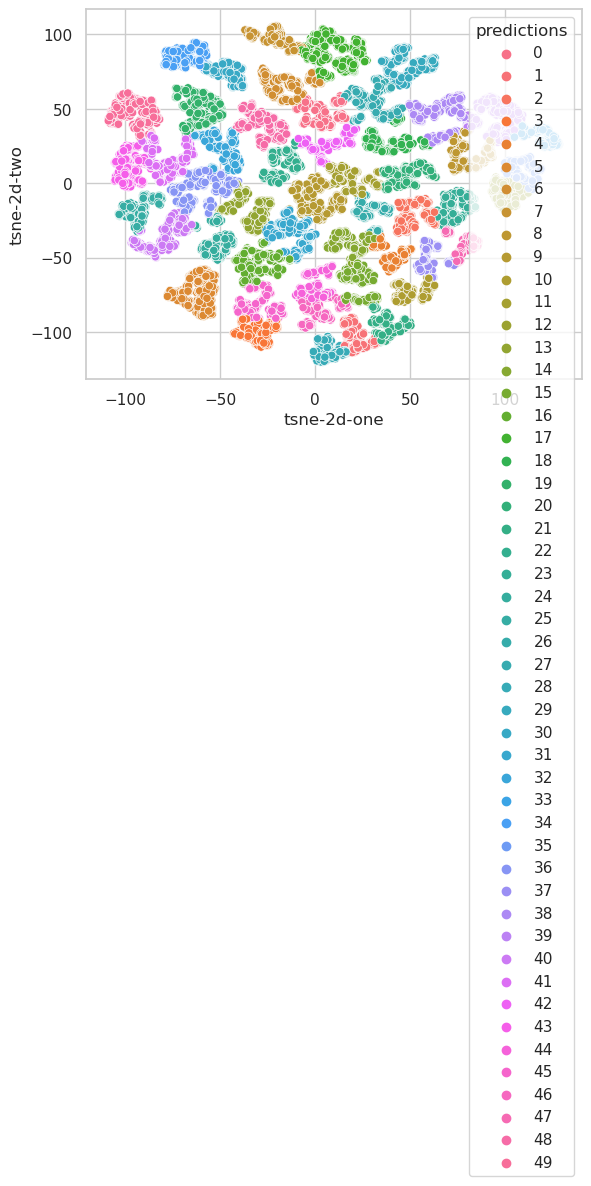

In [420]:
def kMeansClustering(pca_df, x = 'PCA1', y = 'PCA2', num_clusters = 3):
    kmeans=  KMeans(init = "random", n_clusters = num_clusters, n_init = 10, max_iter = 300, random_state = 42)
    kmeans.fit_predict(pca_df.iloc[:,:2])
    temp_df = pca_df
    temp_df['predictions'] = kmeans.labels_

    temp_df['predictions'] = temp_df.predictions.astype('category')
    ax = sns.scatterplot(x = x, y = y, hue = 'predictions', data = temp_df)

kMeansClustering(tsne_results_df_10, x = "tsne-2d-one", y = "tsne-2d-two", num_clusters = 50)

In [417]:
tsne_results_df_10

tsne-2d-one  tsne-2d-two predictions
0       -31.524986   -64.636757          16
1        -9.784859    -1.884879           9
2        19.372129    91.463654          17
3       -40.739956    -0.751548          13
4       108.971458    45.899044          39
...            ...          ...         ...
12323    83.402977   -42.345234          47
12324    90.085579    54.419880          39
12325   -40.536331   -86.596832          45
12326   -47.368877   -37.355083          24
12327   -52.616726    33.416592          32

[12328 rows x 3 columns]